#  Imported liberaries and Moduls

In [45]:
import numpy as np 
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

## importing data for digit and char

In [3]:
dataset_char = pd.read_csv("A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32')
# dataset_char = pd.read_csv("A_Z Handwritten Data/A_Z Handwritten Data.csv")

dataset_char.rename(columns={'0':'label'}, inplace=True)
#Splite data the X - Our data , and y - the prdict label
X_char = dataset_char.drop('label',axis = 1)
y_char = dataset_char['label']

In [4]:
dataset_digit = pd.read_csv("mnist/mnist_frame.csv").astype('float32')
# dataset_digit = pd.read_csv("mnist/mnist_frame.csv")

dataset_digit.rename(columns={'0':'class'}, inplace=True)
#Splite data the X - Our data , and y - the prdict label
X_digit = dataset_digit.drop('class',axis = 1)
y_digit = dataset_digit['class']

In [5]:
# X_char = pd.DataFrame(X_char)
# y_char = pd.DataFrame(y_char)
# X_digit = pd.DataFrame(X_digit)
# y_digit = pd.DataFrame(y_digit)

# train = pd.concat([X_char, y_char], axis=1)

# test = pd.concat([X_digit, y_digit], axis=1)

# full = pd.concat([train, test], axis=0)

# full = full.reset_index(drop=True)

# full.to_csv('digit_char.csv',index=False)
# # print(dataset_char)
# print(dataset_digit)

In [6]:
print(X_char)
print(X_digit)

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

## Exploring both data

In [7]:
print("shape:",X_char.shape)
print("culoms count:",len(X_char.iloc[1]))
print("784 = 28X28")

X_char.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print("shape:",X_digit.shape)
print("culoms count:",len(X_digit.iloc[1]))
print("784 = 28X28")

X_digit.head()

shape: (70000, 784)
culoms count: 784
784 = 28X28


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


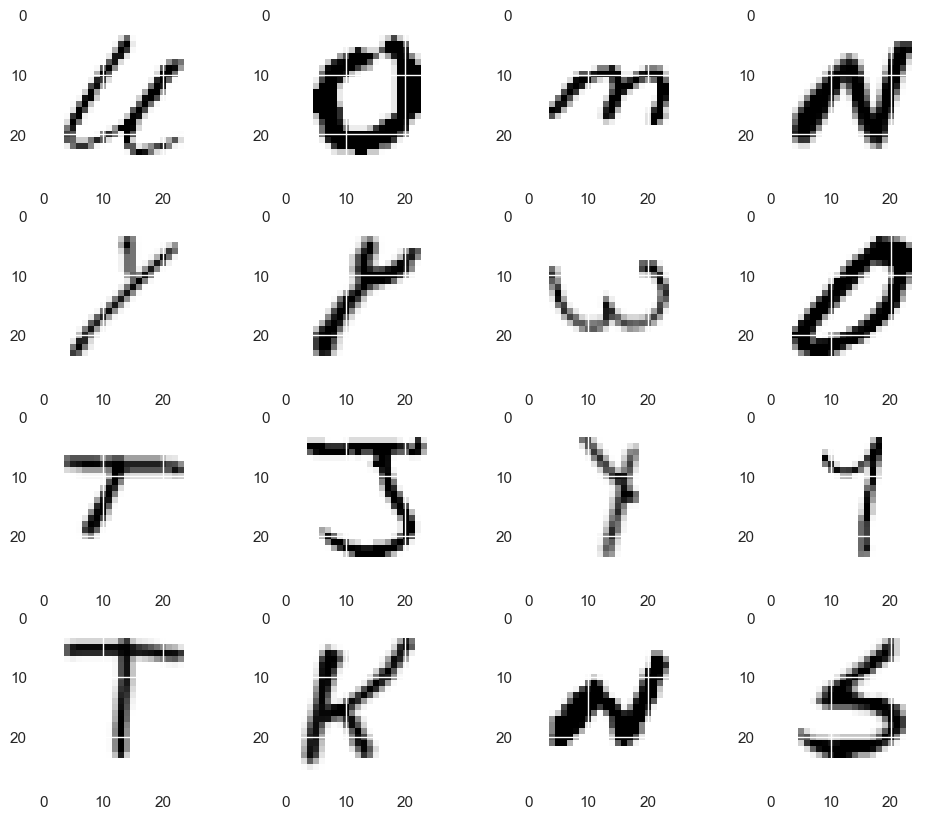

In [9]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X_char)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

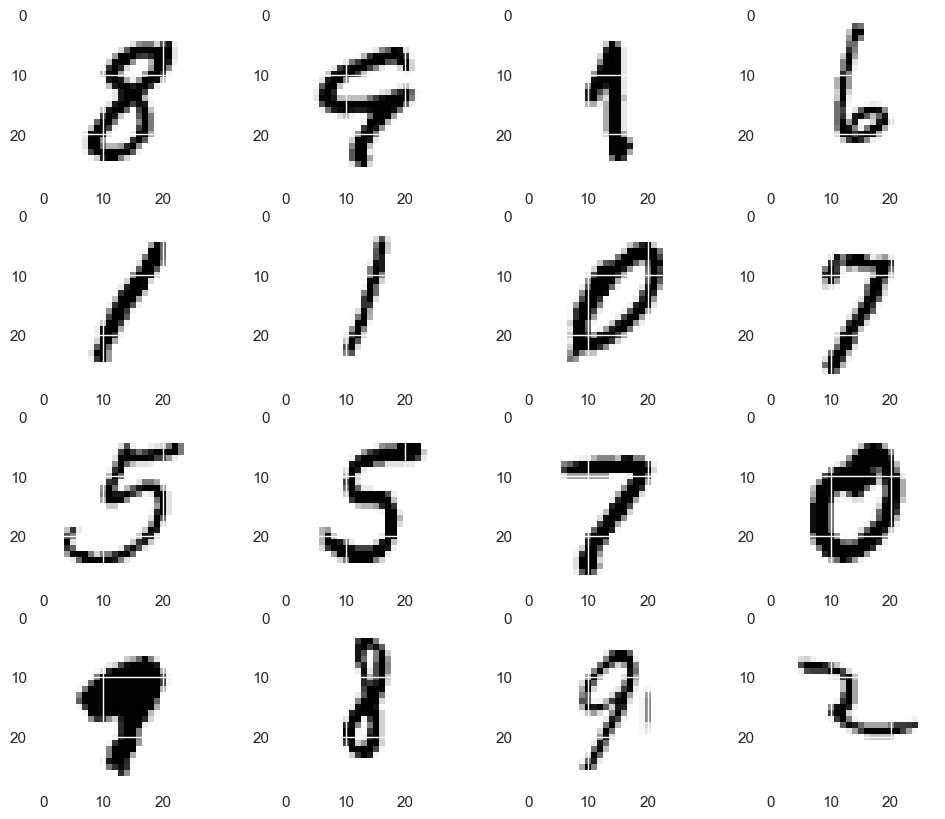

In [10]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X_digit)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


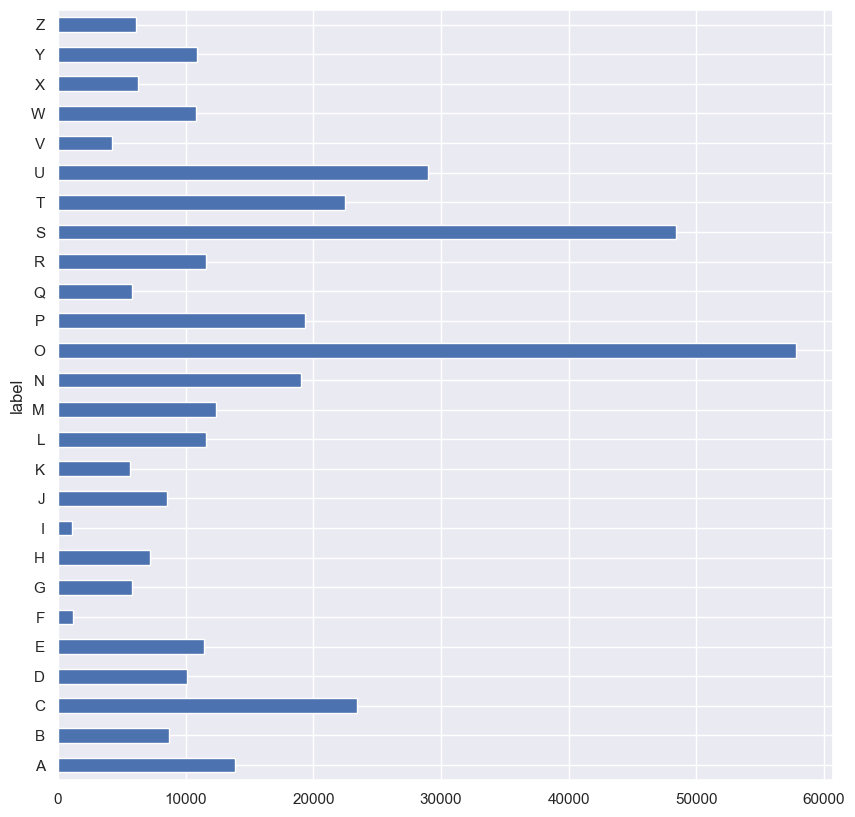

We have very low observations for I and F 
I count: 1120
F count: 1163


In [11]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset_char.copy()
dataset_char['label'] = dataset_char['label'].map(alphabets_mapper)

label_size = dataset_char.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

Amount of each labels


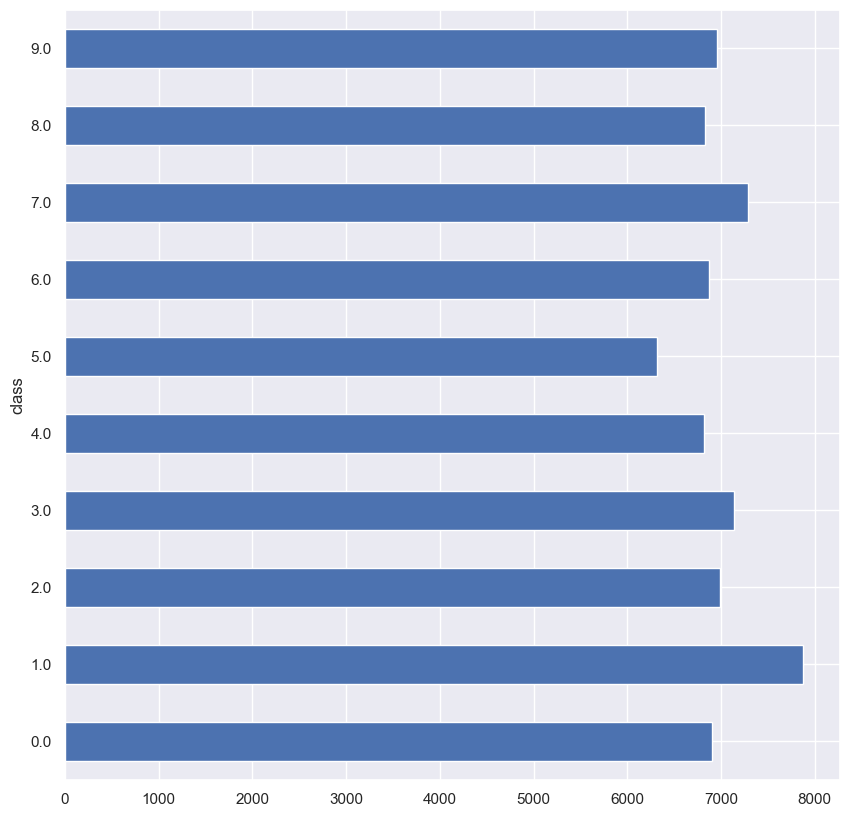

In [12]:
print("Amount of each labels")

# Change label to alphabets
# alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
# dataset_alphabets = dataset_char.copy()
# dataset_char['label'] = dataset_char['label'].map(alphabets_mapper)

label_size = dataset_digit.groupby('class').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

## data preparation

In [13]:
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split(X_char,y_char)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train_char)

# Convert training labels from numeric to characters
y_train_chars = y_train_char+10

# Convert test labels from numeric to characters
y_test_chars = y_test_char+10
print(y_train_chars)

X_train_char = standard_scaler.transform(X_train_char)
X_test_char = standard_scaler.transform(X_test_char)

316451    30.0
91250     19.0
120233    22.0
133177    23.0
319124    30.0
          ... 
359253    34.0
309485    30.0
117288    22.0
3019      10.0
312522    30.0
Name: label, Length: 279337, dtype: float32


In [14]:
print(min(y_train_chars))

10.0


In [15]:
y_train_chars

316451    30.0
91250     19.0
120233    22.0
133177    23.0
319124    30.0
          ... 
359253    34.0
309485    30.0
117288    22.0
3019      10.0
312522    30.0
Name: label, Length: 279337, dtype: float32

In [16]:
X_train_digit, X_test_digit, y_train_digit, y_test_digit = X_digit[:60000],X_digit[60000:],y_digit[:60000],y_digit[60000:]
# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train_digit)

X_train_digit = standard_scaler.transform(X_train_digit)
X_test_digit = standard_scaler.transform(X_test_digit)

In [17]:
# X_train=pd.merge(X_train_char,X_train_digit,on='key',how='outer')
# X_train.drop('key',axis=1,inplace=True)
X_train=np.vstack((X_train_char,X_train_digit))
X_test=np.vstack((X_test_char,X_test_digit))
y_train=np.hstack((y_train_chars,y_train_digit))
y_test=np.hstack((y_test_chars,y_test_digit))
y=pd.Series(np.hstack((y_train,y_test)))

In [18]:
y_train

array([30., 19., 22., ...,  5.,  6.,  8.], dtype=float32)

In [19]:
X_train.shape

(339337, 784)

In [20]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_test.shape

(103113, 784)

In [22]:
y_train.shape

(339337,)

In [23]:
y_test.shape

(103113,)

In [24]:
y_train

array([30., 19., 22., ...,  5.,  6.,  8.], dtype=float32)

In [25]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
# X_train = pd.DataFrame(X_train)
# X_train.to_csv('x_train_digit_char.csv',index=False)

In [27]:
# X_test = pd.DataFrame(X_test)
# X_test.to_csv('x_test_digit_char.csv',index=False)

In [28]:
# y_train = pd.DataFrame(y_train)
# y_train.to_csv('y_train_digit_char.csv',index=False)

In [29]:
# y_test = pd.DataFrame(y_test)
# y_test.to_csv('y_test_digit_char.csv',index=False)

In [30]:
# train_df = pd.concat([X_train, y_train], axis=1)

# test_df = pd.concat([X_test, y_test], axis=1)

# full_df = pd.concat([train_df, test_df], axis=0)

# full_df = full_df.reset_index(drop=True)

# full_df.to_csv('digit_char-data.csv',index=False)

Data after scaler


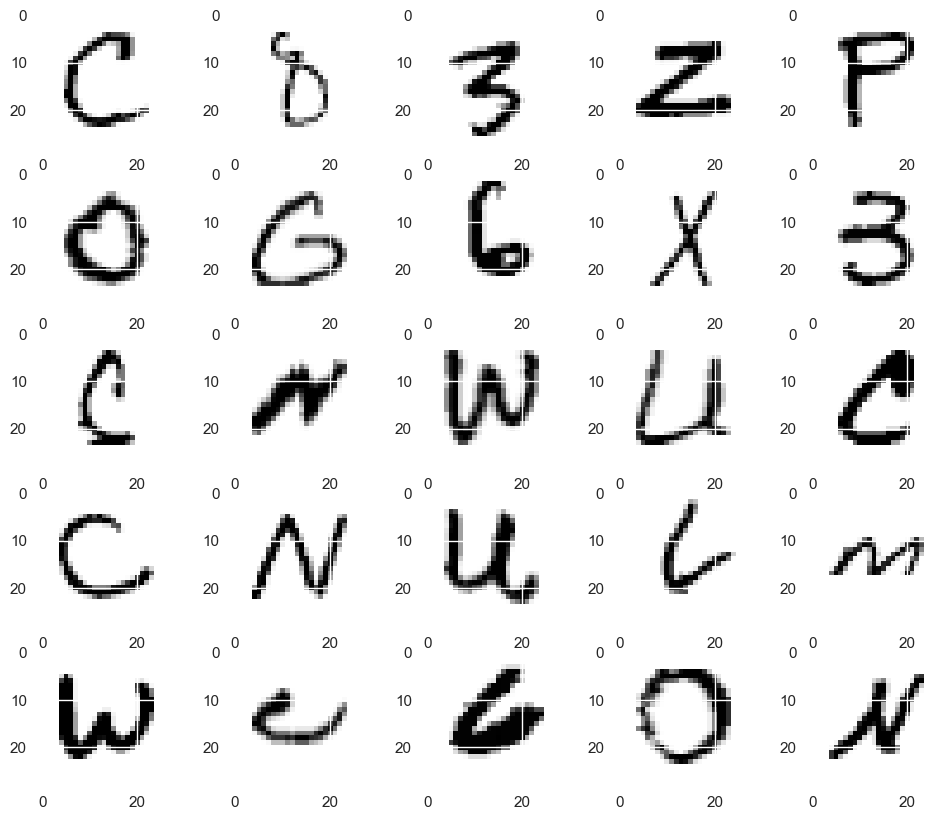

In [31]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [32]:
train_indices = np.random.permutation(len(X_train))
shuffled_train_features = X_train[train_indices]
shuffled_train_labels = y_train[train_indices]

# Shuffle the test data
test_indices = np.random.permutation(len(X_test))
shuffled_test_features = X_test[test_indices]
shuffled_test_labels = y_test[test_indices]

Data after scaler


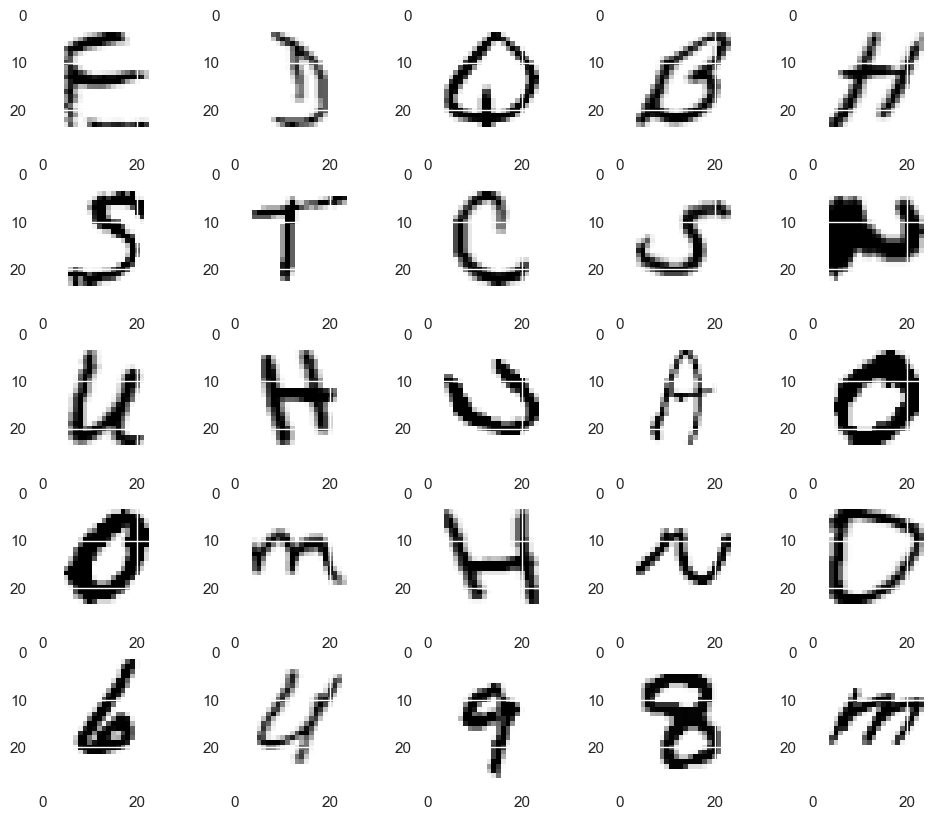

In [33]:
print("Data after scaler")
X_shuffle = shuffle(shuffled_train_features)

plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

 X_train =pd.DataFrame(shuffled_train_features)
 
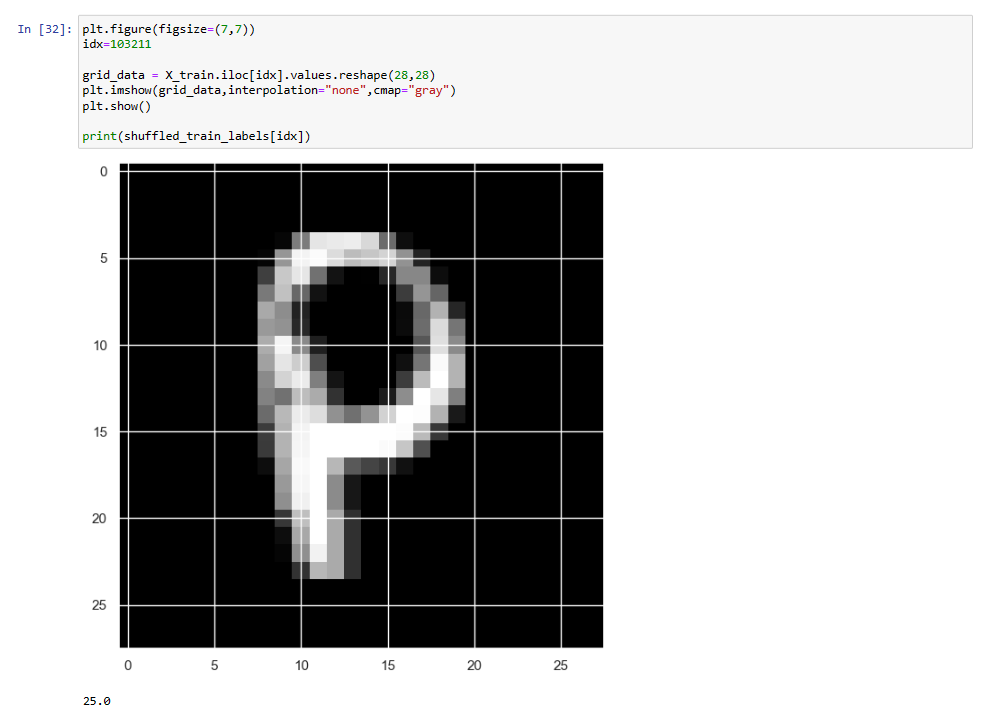

In [34]:
X_train = shuffled_train_features.reshape(shuffled_train_features.shape[0], 28, 28, 1).astype('float32')
X_test = shuffled_test_features.reshape(shuffled_test_features.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(shuffled_train_labels)
y_test = np_utils.to_categorical(shuffled_test_labels)

## model

In [35]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)
0
scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1697/1697 - 162s - loss: 0.3070 - accuracy: 0.9143 - val_loss: 0.1267 - val_accuracy: 0.9667 - 162s/epoch - 95ms/step
Epoch 2/18
1697/1697 - 148s - loss: 0.1339 - accuracy: 0.9616 - val_loss: 0.0966 - val_accuracy: 0.9740 - 148s/epoch - 87ms/step
Epoch 3/18
1697/1697 - 149s - loss: 0.1050 - accuracy: 0.9692 - val_loss: 0.0930 - val_accuracy: 0.9758 - 149s/epoch - 88ms/step
Epoch 4/18
1697/1697 - 154s - loss: 0.0888 - accuracy: 0.9737 - val_loss: 0.0812 - val_accuracy: 0.9790 - 154s/epoch - 91ms/step
Epoch 5/18
1697/1697 - 146s - loss: 0.0775 - accuracy: 0.9766 - val_loss: 0.0754 - val_accuracy: 0.9810 - 146s/epoch - 86ms/step
Epoch 6/18
1697/1697 - 146s - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0703 - val_accuracy: 0.9820 - 146s/epoch - 86ms/step
Epoch 7/18
1697/1697 - 145s - loss: 0.0608 - accuracy: 0.9809 - val_loss: 0.0699 - val_accuracy: 0.9831 - 145s/epoch - 85ms/step
Epoch 8/18
1697/1697 - 146s - loss: 0.0551 - accuracy: 0.9824 - val_loss: 0.0689 - val_accuracy: 

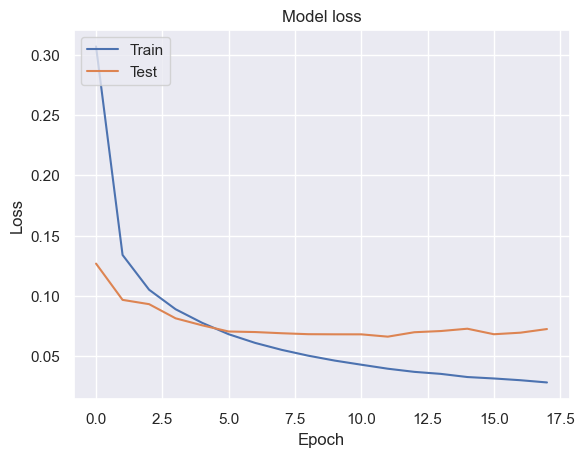

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

3223/3223 [==============================] - 21s 6ms/step


<AxesSubplot:>

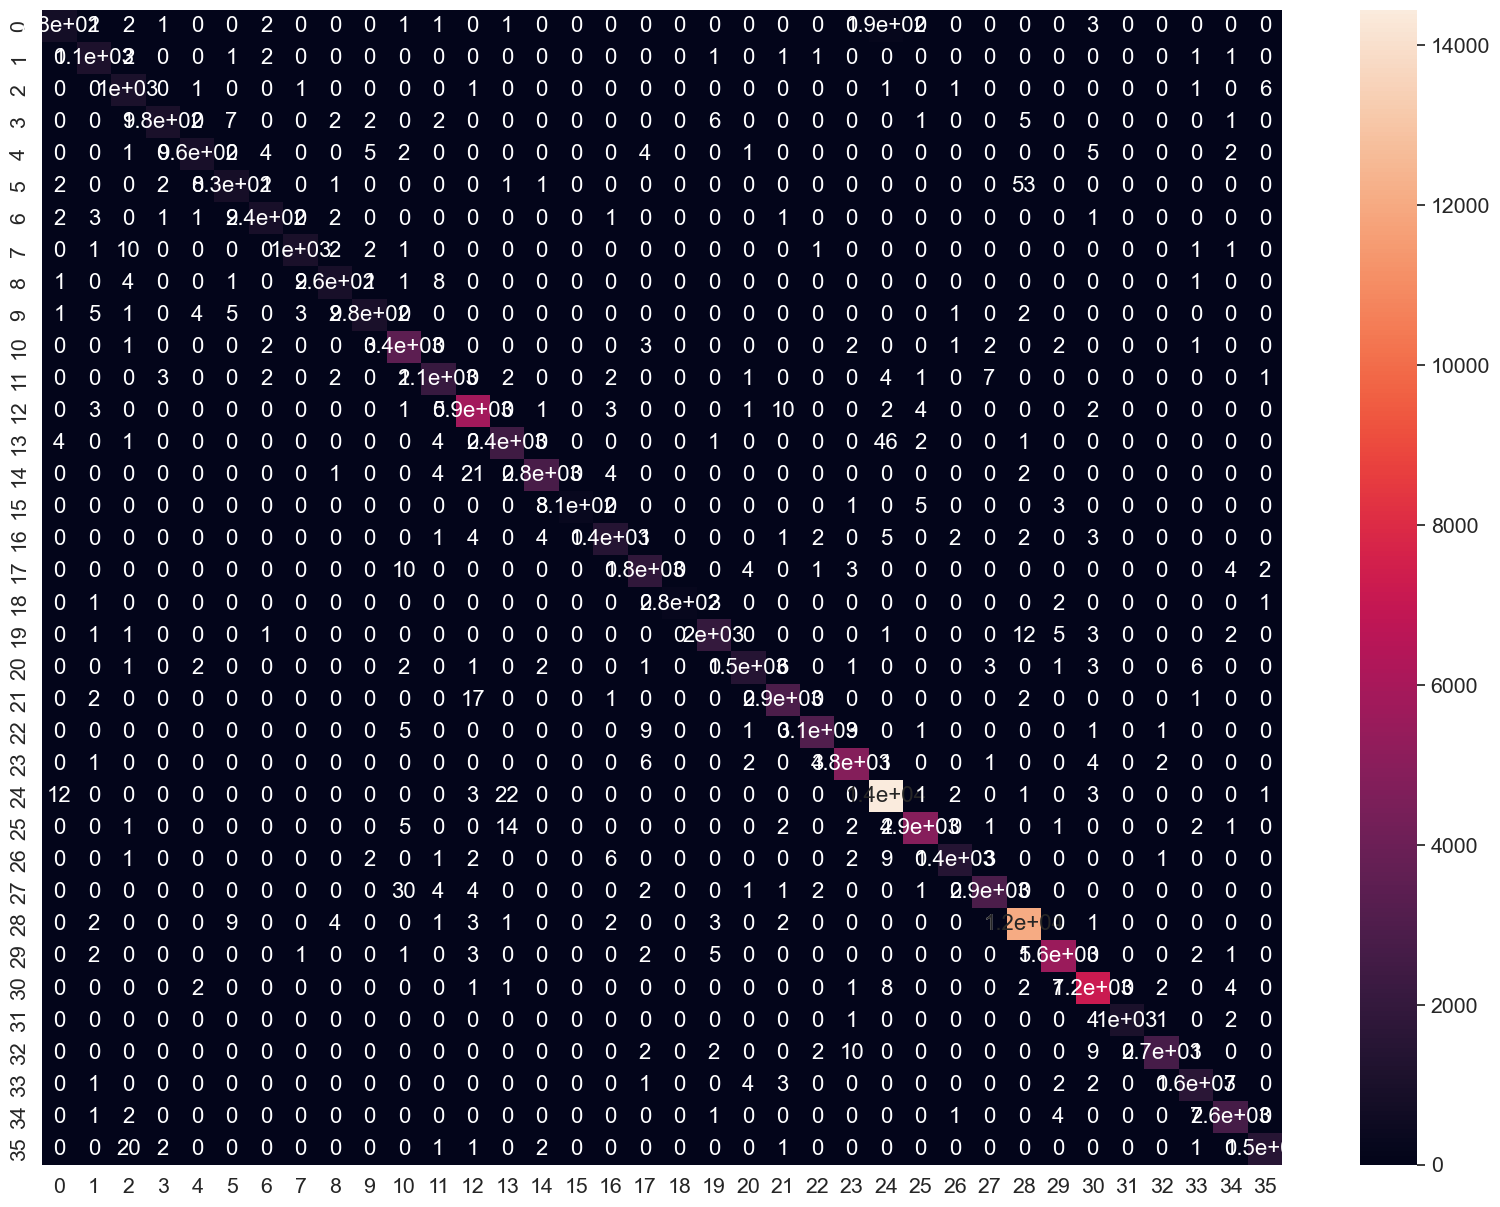

In [37]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(36),
                  range(36))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size